# Importing dependencies

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# this 'device' will be used for training our model
device = torch.device("cpu")


C:\Users\Sucheta Jhunjhunwala\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Sucheta Jhunjhunwala\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


# Loading the dataset

In [2]:
# images are 28x28 pixels
input_size  = 28*56 


#There are 100 possible classes, from 00 to 99
output_size = 100


train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',download=True, train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10, shuffle=True)

# Visualizing the dataset

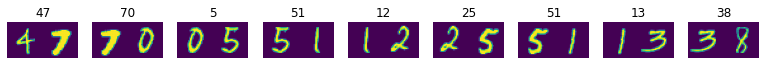

In [3]:
plt.figure(figsize=(15,7))
import numpy as np
image_batch, label_batch = next(iter(train_loader))
for i in range(10-1):
    image1 = image_batch[i]
    image2=image_batch[i+1]
    label1 = label_batch[i].item()
    label2 = label_batch[i+1].item()
    label=int(str(label1)+str(label2))
    plt.subplot(5, 10, i + 1)
    image=torch.cat((image1[0],image2[0]),axis=1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)



<b>To find the number of parameters in the network</b>

In [4]:
def get_n_params(model):
  np=0
  for p in list(model.parameters()):
    np+=p.nelement()
  return np

<h1>Train the model for one batch of training data</h1>

In [5]:
def train(epoch,model):
    
  model.train()
  for batch_idx,(data,target) in enumerate(train_loader):
    #Creating an empty tensor to store the concatenated images
    images=torch.tensor([])


    #Creating a tensor for storing the labels of the concatenated images
    labels=torch.tensor([])


    for i in range(20):
      for j in range(20):


        #Concatenating two numbers to form a double digit number
        image=torch.cat((data[i],data[j]),axis=2)
        image=torch.unsqueeze(image,axis=0)

        #Creating the label of the corresponding image
        label=target[i].item() * 10 + target[j].item()


        #Adding the image to the tensor
        images=torch.cat((images,image),axis=0)


        #Adding the label to the tensor
        labels=torch.cat((labels,torch.tensor([label])))

    
    #Converting the labels into a Long type tensor
    labels = labels.type(torch.LongTensor)
    
    
    #Keeping both the model and the data on the same device
    images,labels=images.to(device),labels.to(device)


    #Initializing zero gradient for our optimizer
    optimizer.zero_grad()
    
    
    #Calculating the output for the training batch
    output=model(images)


    #Specifying the loss function, here using Binary Cross-entropy
    loss=F.nll_loss(output,labels)

    #Initiating backpropagation
    loss.backward()
    
    
    #Using Gradient descent to update the parameters
    optimizer.step()
    
    
    if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * 400, len(train_loader)*400,
                100. * batch_idx / len(train_loader), loss.item()))


<h1>Testing the model on unseen data</h1>

In [6]:


def test(model):
    accuracy_list=[]

    #Evaluating the model
    model.eval()


    #Initializing test loss
    test_loss = 0


    #Initializing the number of labels the model got right
    correct = 0



    for data, target in test_loader:
      images=torch.tensor([])
      labels=torch.tensor([])
      for i in range(10):
        for j in range(10):
          image=torch.cat((data[i],data[j]),axis=2)
          image=torch.unsqueeze(image,axis=0)
          label=target[i].item()*10 + target[j].item() 
          images=torch.cat((images,image),axis=0)
          labels=torch.cat((labels,torch.tensor([label])))
    
      labels = labels.type(torch.LongTensor)
      images, labels = images.to(device), labels.to(device)


      #Calculating the output for the test data    
      output = model(images)


      #Calculating the loss for the testing data and summing up the loss for the entire batch
      test_loss += F.nll_loss(output, labels, reduction='sum').item()


      #Predicting the label
      pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
      correct += pred.eq(labels.data.view_as(pred)).cpu().sum().item()


    #Calculating the net test loss
    test_loss /= len(test_loader.dataset)

    #Calculating model accuracy
    accuracy = 100. * correct / (len(test_loader)*100)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader)*100,
          accuracy))
    return accuracy_list

<h1>Creating a class for building the model</h1>

In [8]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 300), 
            nn.ReLU(), 
            nn.Linear(300,200), 
            nn.ReLU(), 
            nn.Linear(200, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

<h1>Training the network</h1>

In [86]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(),lr=0.01)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 551000
Train Epoch: 0 [0/375200 (0%)]	Loss: 4.603128
Train Epoch: 0 [20000/375200 (5%)]	Loss: 4.578611
Train Epoch: 0 [40000/375200 (11%)]	Loss: 4.542874
Train Epoch: 0 [60000/375200 (16%)]	Loss: 4.519100
Train Epoch: 0 [80000/375200 (21%)]	Loss: 4.484552
Train Epoch: 0 [100000/375200 (27%)]	Loss: 4.425750
Train Epoch: 0 [120000/375200 (32%)]	Loss: 4.270868
Train Epoch: 0 [140000/375200 (37%)]	Loss: 4.036153
Train Epoch: 0 [160000/375200 (43%)]	Loss: 4.009488
Train Epoch: 0 [180000/375200 (48%)]	Loss: 3.817904
Train Epoch: 0 [200000/375200 (53%)]	Loss: 3.505294
Train Epoch: 0 [220000/375200 (59%)]	Loss: 3.221072
Train Epoch: 0 [240000/375200 (64%)]	Loss: 2.684927
Train Epoch: 0 [260000/375200 (69%)]	Loss: 2.493586
Train Epoch: 0 [280000/375200 (75%)]	Loss: 2.433460
Train Epoch: 0 [300000/375200 (80%)]	Loss: 2.075149
Train Epoch: 0 [320000/375200 (85%)]	Loss: 1.801693
Train Epoch: 0 [340000/375200 (91%)]	Loss: 1.878752
Train Epoch: 0 [360000/375200

In [9]:
import numpy
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''

    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(img.squeeze())
    ax.axis('off')
    pred_label = numpy.argmax(pred_prob)
    ax.set_title([f"True label :{real_label}",f"Predicted label :{pred_label}"])


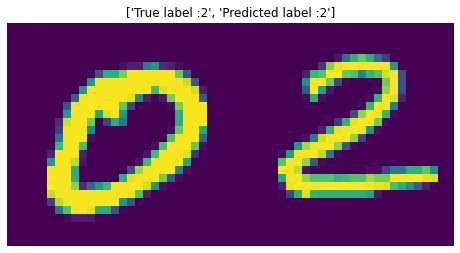

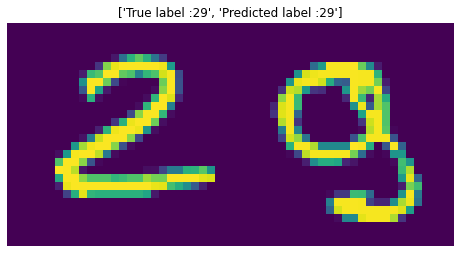

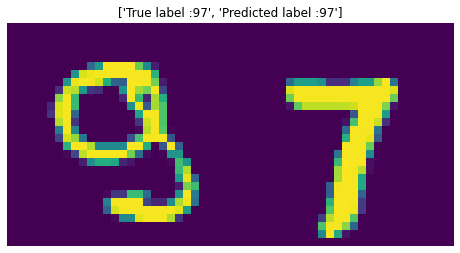

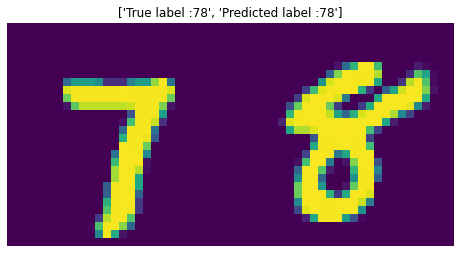

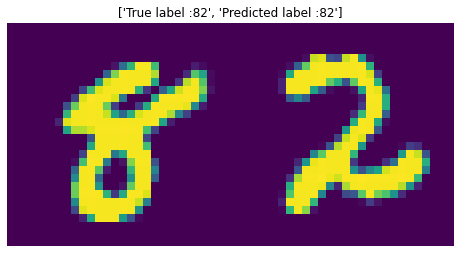

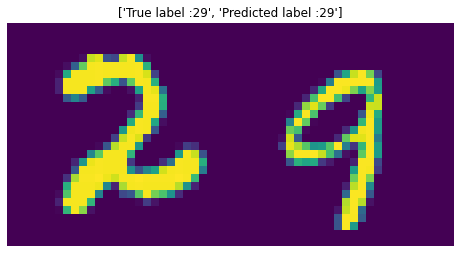

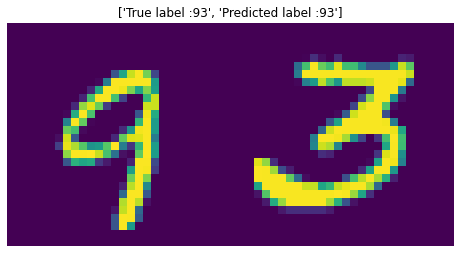

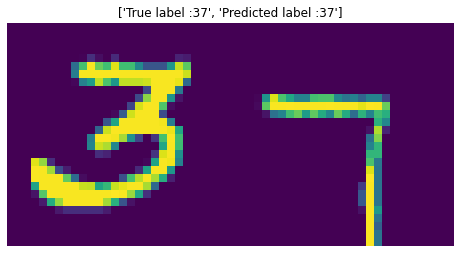

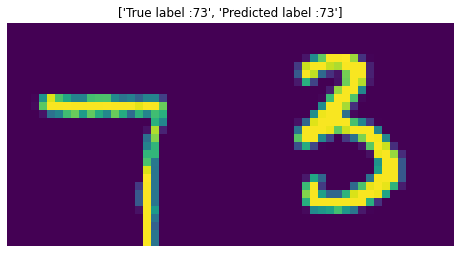

In [103]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
images,labels=torch.tensor([]),torch.tensor([])
for i in range(10-1):
    im1=image_batch[i]
    im2=image_batch[i+1]
    image=torch.cat((im1[0],im2[0]),axis=1)
    image=torch.unsqueeze(image,axis=0)
    label=int(str(label_batch[i].item())+str(label_batch[i+1].item()))
    images=torch.cat((images,image),axis=0)
    labels=torch.cat((labels,torch.tensor([label])))
with torch.no_grad():
    log_pred_prob_batch = model_fnn(images)
for i in range(10-1):
    img = images[i]
    real_label = int(labels[i].item())
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Using Momentum

In [10]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(),momentum=0.9,lr=0.01)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 551000
Train Epoch: 0 [0/375200 (0%)]	Loss: 4.616582
Train Epoch: 0 [20000/375200 (5%)]	Loss: 4.295402
Train Epoch: 0 [40000/375200 (11%)]	Loss: 2.205247
Train Epoch: 0 [60000/375200 (16%)]	Loss: 1.711662
Train Epoch: 0 [80000/375200 (21%)]	Loss: 1.675434
Train Epoch: 0 [100000/375200 (27%)]	Loss: 1.605957
Train Epoch: 0 [120000/375200 (32%)]	Loss: 1.320402
Train Epoch: 0 [140000/375200 (37%)]	Loss: 0.616253
Train Epoch: 0 [160000/375200 (43%)]	Loss: 2.057528
Train Epoch: 0 [180000/375200 (48%)]	Loss: 0.355421
Train Epoch: 0 [200000/375200 (53%)]	Loss: 1.275557
Train Epoch: 0 [220000/375200 (59%)]	Loss: 0.710826
Train Epoch: 0 [240000/375200 (64%)]	Loss: 0.635742
Train Epoch: 0 [260000/375200 (69%)]	Loss: 0.304427
Train Epoch: 0 [280000/375200 (75%)]	Loss: 0.628087
Train Epoch: 0 [300000/375200 (80%)]	Loss: 0.691542
Train Epoch: 0 [320000/375200 (85%)]	Loss: 0.400082
Train Epoch: 0 [340000/375200 (91%)]	Loss: 0.324115
Train Epoch: 0 [360000/375200

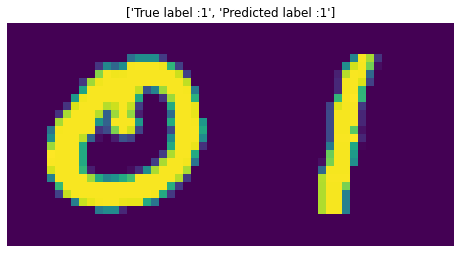

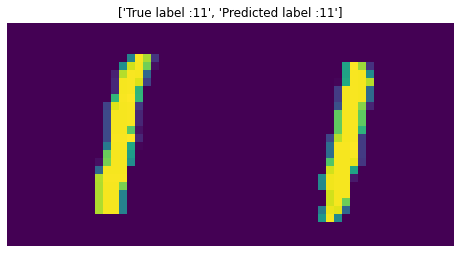

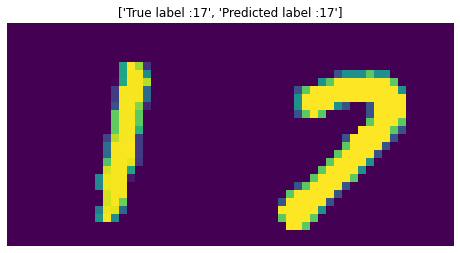

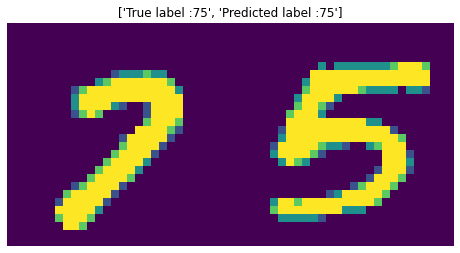

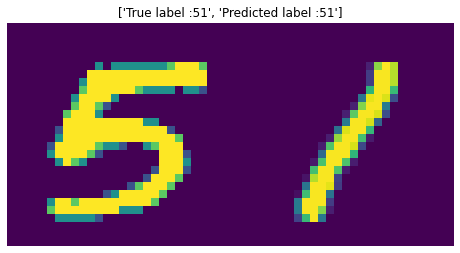

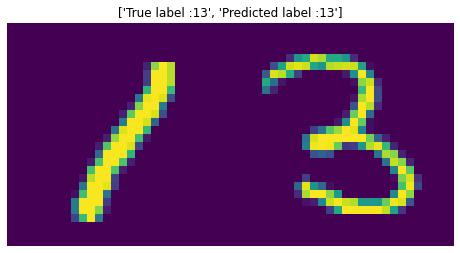

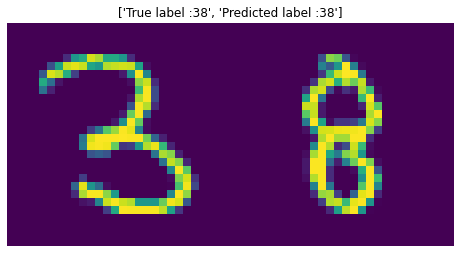

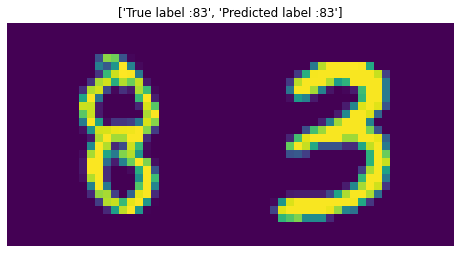

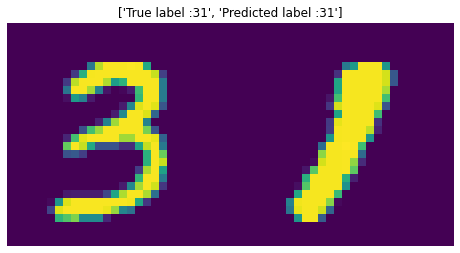

In [11]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
images,labels=torch.tensor([]),torch.tensor([])
for i in range(10-1):
    im1=image_batch[i]
    im2=image_batch[i+1]
    image=torch.cat((im1[0],im2[0]),axis=1)
    image=torch.unsqueeze(image,axis=0)
    label=int(str(label_batch[i].item())+str(label_batch[i+1].item()))
    images=torch.cat((images,image),axis=0)
    labels=torch.cat((labels,torch.tensor([label])))
with torch.no_grad():
    log_pred_prob_batch = model_fnn(images)
for i in range(10-1):
    img = images[i]
    real_label = int(labels[i].item())
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Using Adam

In [12]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.Adam(model_fnn.parameters(),lr=0.01,betas=(0.9,0.99))
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 551000
Train Epoch: 0 [0/375200 (0%)]	Loss: 4.607196
Train Epoch: 0 [20000/375200 (5%)]	Loss: 2.526698
Train Epoch: 0 [40000/375200 (11%)]	Loss: 1.294004
Train Epoch: 0 [60000/375200 (16%)]	Loss: 1.131409
Train Epoch: 0 [80000/375200 (21%)]	Loss: 2.548344
Train Epoch: 0 [100000/375200 (27%)]	Loss: 0.963543
Train Epoch: 0 [120000/375200 (32%)]	Loss: 1.271379
Train Epoch: 0 [140000/375200 (37%)]	Loss: 0.799902
Train Epoch: 0 [160000/375200 (43%)]	Loss: 0.422985
Train Epoch: 0 [180000/375200 (48%)]	Loss: 1.027511
Train Epoch: 0 [200000/375200 (53%)]	Loss: 0.773001
Train Epoch: 0 [220000/375200 (59%)]	Loss: 1.027744
Train Epoch: 0 [240000/375200 (64%)]	Loss: 0.489873
Train Epoch: 0 [260000/375200 (69%)]	Loss: 1.329878
Train Epoch: 0 [280000/375200 (75%)]	Loss: 0.652928
Train Epoch: 0 [300000/375200 (80%)]	Loss: 0.572211
Train Epoch: 0 [320000/375200 (85%)]	Loss: 1.133297
Train Epoch: 0 [340000/375200 (91%)]	Loss: 0.673813
Train Epoch: 0 [360000/375200

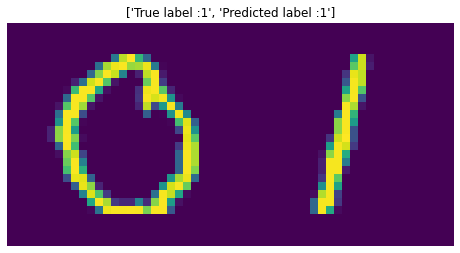

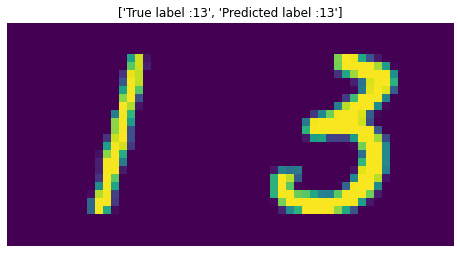

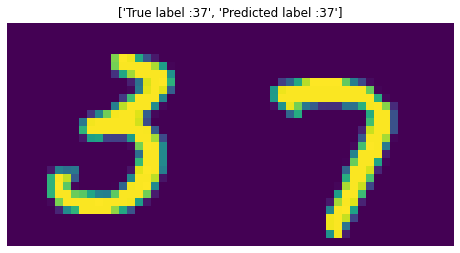

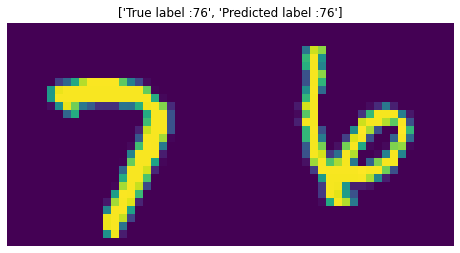

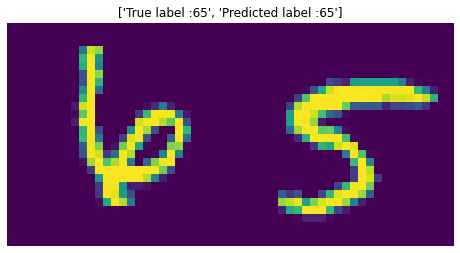

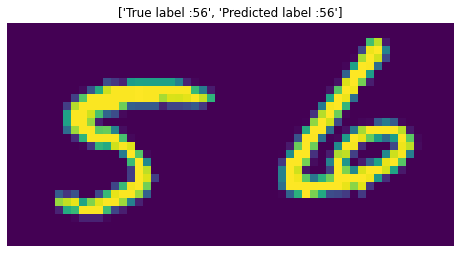

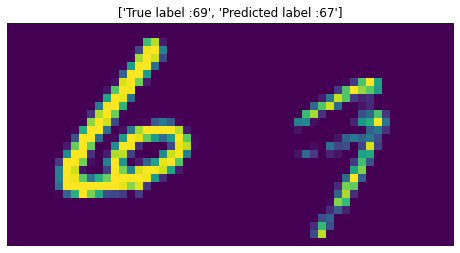

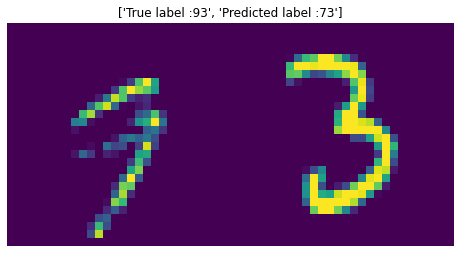

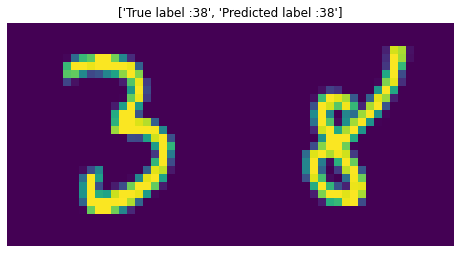

In [13]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
images,labels=torch.tensor([]),torch.tensor([])
for i in range(10-1):
    im1=image_batch[i]
    im2=image_batch[i+1]
    image=torch.cat((im1[0],im2[0]),axis=1)
    image=torch.unsqueeze(image,axis=0)
    label=int(str(label_batch[i].item())+str(label_batch[i+1].item()))
    images=torch.cat((images,image),axis=0)
    labels=torch.cat((labels,torch.tensor([label])))
with torch.no_grad():
    log_pred_prob_batch = model_fnn(images)
for i in range(10-1):
    img = images[i]
    real_label = int(labels[i].item())
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

# Network with Dropout

In [111]:
class FC2LayerDropout(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2LayerDropout, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 300),
            nn.Dropout(0.25),
            nn.ReLU(), 
            nn.Linear(300, 200),
            nn.Dropout(0.25),
            nn.ReLU(), 
            nn.Linear(200, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [108]:
print("Training on ", device)
model_fnn = FC2LayerDropout(input_size, output_size)
model_fnn.to(device)
optimizer = optim.SGD(model_fnn.parameters(),lr=0.01)
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cpu
Number of parameters: 551000
Train Epoch: 0 [0/375200 (0%)]	Loss: 4.607730
Train Epoch: 0 [20000/375200 (5%)]	Loss: 4.579513
Train Epoch: 0 [40000/375200 (11%)]	Loss: 4.571649
Train Epoch: 0 [60000/375200 (16%)]	Loss: 4.510733
Train Epoch: 0 [80000/375200 (21%)]	Loss: 4.507179
Train Epoch: 0 [100000/375200 (27%)]	Loss: 4.433755
Train Epoch: 0 [120000/375200 (32%)]	Loss: 4.405075
Train Epoch: 0 [140000/375200 (37%)]	Loss: 4.242608
Train Epoch: 0 [160000/375200 (43%)]	Loss: 3.982216
Train Epoch: 0 [180000/375200 (48%)]	Loss: 3.810169
Train Epoch: 0 [200000/375200 (53%)]	Loss: 3.885903
Train Epoch: 0 [220000/375200 (59%)]	Loss: 3.552762
Train Epoch: 0 [240000/375200 (64%)]	Loss: 3.368582
Train Epoch: 0 [260000/375200 (69%)]	Loss: 3.376828
Train Epoch: 0 [280000/375200 (75%)]	Loss: 3.033629
Train Epoch: 0 [300000/375200 (80%)]	Loss: 2.950654
Train Epoch: 0 [320000/375200 (85%)]	Loss: 2.968744
Train Epoch: 0 [340000/375200 (91%)]	Loss: 2.566860
Train Epoch: 0 [360000/375200

In [112]:
model_fnn.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
images,labels=torch.tensor([]),torch.tensor([])
for i in range(10-1):
    im1=image_batch[i]
    im2=image_batch[i+1]
    image=torch.cat((im1[0],im2[0]),axis=1)
    image=torch.unsqueeze(image,axis=0)
    label=int(str(label_batch[i].item())+str(label_batch[i+1].item()))
    images=torch.cat((images,image),axis=0)
    labels=torch.cat((labels,torch.tensor([label])))
with torch.no_grad():
    log_pred_prob_batch = FC2LayerDropout(images)
for i in range(10-1):
    img = images[i]
    real_label = int(labels[i].item())
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

TypeError: __init__() missing 1 required positional argument: 'output_size'

In [16]:
accuracy_list

[82.428,
 88.373,
 91.053,
 91.855,
 92.623,
 91.955,
 93.758,
 94.126,
 94.479,
 94.154,
 80.09,
 79.004,
 81.719,
 82.342,
 78.891,
 82.086,
 81.066,
 83.262,
 81.44,
 83.742]